# Factor Analysis

## Imports

In [ ]:
#!pip install plotly
#!pip install pingouin
#conda install -c conda-forge tableone

In [106]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import json
import requests
import pickle
import pandas as pd
import numpy as np
import copy
import warnings
import scipy.stats as stats
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import resample
import pingouin as pg
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr
from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import copy
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
from tableone import TableOne
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [107]:
import sklearn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import spearmanr, pearsonr
from sklearn import preprocessing
#from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
import copy
import warnings
import scipy.stats as stats
from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from scipy.stats import ttest_ind, mannwhitneyu, wilcoxon
from tableone import TableOne


In [108]:
US_zip_health_df = pd.read_pickle('../../../data/US_zip_health_df.pkl')
CA_zip_misc_svi_df = pd.read_pickle('../CA_zip_vaccination_svi_cleaned_df.pkl')
CA_zip_misc_svi_all_df = pd.read_pickle('../CA_zip_vaccination_svi_df.pkl')

## Z and Temp2

In [109]:
z = pd.concat([CA_zip_misc_svi_df,US_zip_health_df], axis=1, join='inner')

In [110]:
z.shape

(1555, 154)

In [111]:
temp2 = pd.DataFrame()

In [112]:
temp2['young_children_prop'] = z['M_5-9_prop'] + z['M_Under_5_prop'] + z['F_5-9_prop'] + z['F_Under_5_prop']

temp2['school_children_prop'] = z['M_10-14_prop'] + z['M_15-19_prop'] + z['F_10-14_prop'] + z['F_15-19_prop']

temp2['M_20_44'] = z['M_20-24_prop' ] + z[ 'M_25-29_prop' ] + z[ 'M_30-34_prop' ] + z[ 'M_35-39_prop'] + z['M_40-44_prop']
temp2['M_45_69'] = z['M_45-49_prop' ] + z[ 'M_50-54_prop' ] + z[ 'M_55-59_prop' ] + z[ 'M_60-64_prop' ] + z[ 'M_65-69_prop']
temp2['M_70_Plus'] = z['M_70-74_prop' ] + z[ 'M_75-79_prop' ] + z[ 'M_80-84_prop' ] + z[ 'M_85_Plus_prop']

temp2['F_20_44'] = z['F_20-24_prop' ] + z[ 'F_25-29_prop' ] + z[ 'F_30-34_prop' ] + z[ 'F_35-39_prop'] + z['F_40-44_prop']
temp2['F_45_69'] = z['F_45-49_prop' ] + z[ 'F_50-54_prop' ] + z[ 'F_55-59_prop' ] + z[ 'F_60-64_prop' ] + z[ 'F_65-69_prop']
temp2['F_70_Plus'] = z['F_70-74_prop' ] + z[ 'F_75-79_prop' ] + z[ 'F_80-84_prop' ] + z[ 'F_85_Plus_prop']

temp2['Educ_AA_or_Less'] = z['School_None_prop' ] + z[ 'Educ_<HS_prop' ] + z[ 'Educ_AA_prop']
temp2['Educ_BA_or_Higher'] = z['Educ_BA_prop' ] + z[ 'Educ_Msters_prop' ] + z[ 'Educ_Prof_prop' ] + z[ 'Educ_Doctorate_prop']

temp2['Commute_10_or_Less'] = z['<10Min_to_work_prop' ] + z[  'walk_commute_prop' ] + z[ 'work_at_home_prop']
temp2['Commute_10_50Min'] = z['<20Min_to_work_prop' ] + z[  '<30Min_to_work_prop'] + z[ '<40Min_to_work_prop' ] + z[ '<50Min_to_work_prop']
temp2['Commute_50_Plus'] = z['<60Min_to_work_prop' ] + z[ '<90Min_to_work_prop' ] + z[ '<90Min_to_work_prop']

temp2['HHI_Poverty'] = z['<25K_HHI_prop' ] + z[ '<45K_HHI_prop']
temp2['HHI_Low'] = z['<60K_HHI_prop' ] + z[ '<100K_HHI_prop']
temp2['HHI_Moderate'] = z['<150K_HHI_prop' ] + z[ '<200K_HHI_prop']
temp2['HHI_High'] = z['>200K_HHI_prop']

temp2['Home_Value_Low'] = z['<25K_Home_Value_prop' ] + z[ '<50K_Home_Value_prop' ] + z[ '<100k_Home_Value_prop']
temp2['Home_Value_Medium'] = z['<150K_Home_Value_prop' ] + z[ '<200K_Home_Value_prop' ] + z[ '<400K_Home_Value_prop']
temp2['Home_Value_High'] = z['<750K_Home_Value_prop' ] + z[ '>750K_Home_Value_prop']

temp2['2Bdrm_or_Less'] = z['Studio_Count_prop'] + z[ '1Bdrm_Count_prop' ] + z[ '2Bdrm_Count_prop']

temp2['Vacancy_Rent_Sale'] = z['Vacant_For_Rent_prop' ] + z[ 'Rented_Unoccupied_prop' ] + z[ 'Vacant_For_Sale_prop' ] + z[ 'Vacant_Sold_Unoccupied_prop']
temp2['Vacancy_Recreation_Other'] = z['Vacant_Recreational_Occasional_prop' ] + z[ 'Vacant_For_Migrant_Workers_prop' ] + z[ 'Vacant_Other_Reasons_prop']

temp2['Home_Age_Pre1930'] = z['<1930_built_prop']
temp2['Home_Age_1930_1970'] = z['1940_built_prop' ] + z[ '1950_built_prop' ] + z[ '1960_built_prop']
temp2['Home_Age_1970_2000'] = z['1970_built_prop' ] + z[ '1980_built_prop' ] + z[ '1990_built_prop']

temp2['Home_Not_Owned'] = z['Home_Owned_Mortgaged_prop'] + z[ 'Home_Rented_prop']
temp2['Home_Owned'] = z['Home_Owned_prop' ] + z[ 'Home_Vacant_prop']

temp2['Living_Not_Home'] = z['Correctional_prop' ] + z[ 'Juvenile_prop' ] + z[ 'Institutional_prop' ] + z[ 'College_prop' ] + z[ 'Military_prop'] 
temp2['Living_Home'] = z['In Occupied Housing Units_prop' ] + z[ 'Noninstitutional_prop']

temp2['Not_Single_Parent_Family'] = z['Husband_Wife_Family_prop' ] + z['Single_Family_prop' ] + z[ 'Single_w_roommate_Family_prop']

temp2['indicators_bad_health']= z['Current lack of health insurance among adults aged 18-64 years'] + z['Physical health not good for >=14 days among adults aged >=18 years'] + z['Sleeping less than 7 hours among adults aged >=18 years'] + z['Obesity among adults aged >=18 years'] + z['No leisure-time physical activity among adults aged >=18 years'] + z['Mental health not good for >=14 days among adults aged >=18 years'] + z['Current smoking among adults aged >=18 years']
temp2['indicators_good_health'] = z['Visits to doctor for routine checkup within the past year among adults aged >=18 years'] + z['Visits to dentist or dental clinic among adults aged >=18 years'] + z['Older adult women aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening, and Mammogram past 2 years'] + z['Older adult men aged >=65 years who are up to date on a core set of clinical preventive services: Flu shot past year, PPV shot ever, Colorectal cancer screening'] + z['Mammography use among women aged 50-74 years'] + z['Cervical cancer screening among adult women aged 21-65 years'] + z['Cholesterol screening among adults aged >=18 years'] + z['Fecal occult blood test, sigmoidoscopy, or colonoscopy among adults aged 50-75 years']
temp2['normal_diseases'] = z['Arthritis among adults aged >=18 years'] + z['Current asthma among adults aged >=18 years'] + z['Diagnosed diabetes among adults aged >=18 years'] + z['High blood pressure among adults aged >=18 years'] + z['High cholesterol among adults aged >=18 years who have been screened in the past 5 years'] + z['Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure']
temp2['dangerous_diseases'] = z['All teeth lost among adults aged >=65 years'] + z['Binge drinking among adults aged >=18 years'] + z['Cancer (excluding skin cancer) among adults aged >=18 years'] + z['Chronic kidney disease among adults aged >=18 years'] + z['Chronic obstructive pulmonary disease among adults aged >=18 years'] + z['Coronary heart disease among adults aged >=18 years'] + z['Stroke among adults aged >=18 years']

## Bartlett's Sphericity and KMO

In [113]:
!pip install factor_analyzer

In [114]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(temp2)
kmo_model

0.7970367848895323

## EFA

In [115]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(temp2)
ev, v = fa.get_eigenvalues()
ev

array([ 9.91996154e+00,  8.27463045e+00,  2.96585420e+00,  2.35740479e+00,
        1.76421115e+00,  1.54794874e+00,  1.38329329e+00,  1.09613749e+00,
        8.73554699e-01,  7.71794863e-01,  6.61195270e-01,  4.93185562e-01,
        4.64723694e-01,  4.22381523e-01,  3.20052473e-01,  2.98018091e-01,
        2.39950560e-01,  2.26495665e-01,  2.08077790e-01,  1.58785419e-01,
        1.13340697e-01,  1.08474626e-01,  8.24159362e-02,  6.65072586e-02,
        5.94477661e-02,  4.99662572e-02,  2.84926461e-02,  1.86537072e-02,
        1.40547306e-02,  1.09891027e-02,  2.51263101e-16,  1.10753857e-16,
        5.44582198e-17,  2.92558190e-17, -2.02643141e-16])

In [116]:
sum(ev)

35.00000000000001

In [117]:
eigenvalues = -np.sort(-ev)
eigenvalues

array([ 9.91996154e+00,  8.27463045e+00,  2.96585420e+00,  2.35740479e+00,
        1.76421115e+00,  1.54794874e+00,  1.38329329e+00,  1.09613749e+00,
        8.73554699e-01,  7.71794863e-01,  6.61195270e-01,  4.93185562e-01,
        4.64723694e-01,  4.22381523e-01,  3.20052473e-01,  2.98018091e-01,
        2.39950560e-01,  2.26495665e-01,  2.08077790e-01,  1.58785419e-01,
        1.13340697e-01,  1.08474626e-01,  8.24159362e-02,  6.65072586e-02,
        5.94477661e-02,  4.99662572e-02,  2.84926461e-02,  1.86537072e-02,
        1.40547306e-02,  1.09891027e-02,  2.51263101e-16,  1.10753857e-16,
        5.44582198e-17,  2.92558190e-17, -2.02643141e-16])

In [118]:
def varaince_included(n):
    new_list = eigenvalues[0:n]
    total_eigenvalue = sum(new_list)
    print(total_eigenvalue/35)
    
varaince_included(4)

0.6719385996352


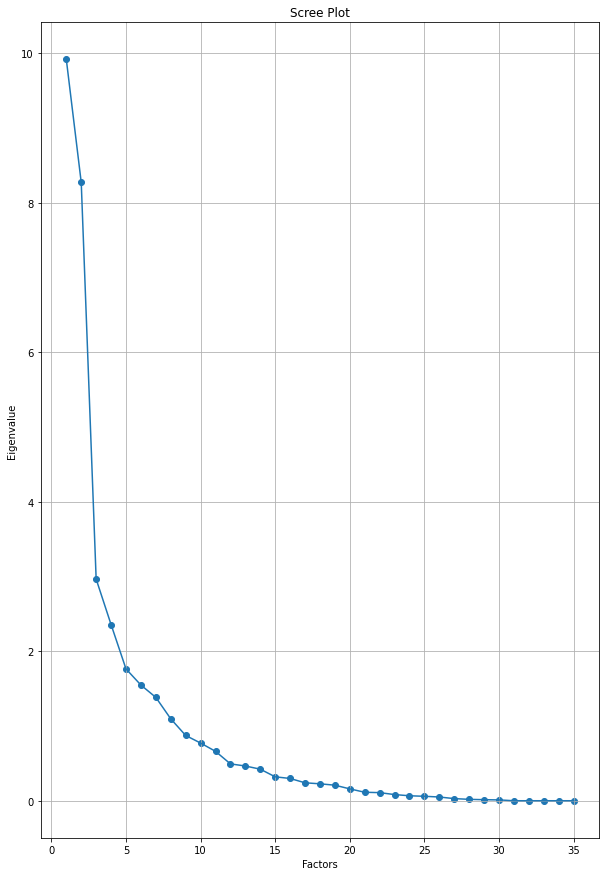

In [119]:
plt.subplots(figsize=(10,15))
plt.scatter(range(1,temp2.shape[1]+1),ev)
plt.plot(range(1,temp2.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [120]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation=None)
fa.fit(temp2)
ev, v = fa.get_eigenvalues()
ev

array([ 9.91996154e+00,  8.27463045e+00,  2.96585420e+00,  2.35740479e+00,
        1.76421115e+00,  1.54794874e+00,  1.38329329e+00,  1.09613749e+00,
        8.73554699e-01,  7.71794863e-01,  6.61195270e-01,  4.93185562e-01,
        4.64723694e-01,  4.22381523e-01,  3.20052473e-01,  2.98018091e-01,
        2.39950560e-01,  2.26495665e-01,  2.08077790e-01,  1.58785419e-01,
        1.13340697e-01,  1.08474626e-01,  8.24159362e-02,  6.65072586e-02,
        5.94477661e-02,  4.99662572e-02,  2.84926461e-02,  1.86537072e-02,
        1.40547306e-02,  1.09891027e-02,  2.51263101e-16,  1.10753857e-16,
        5.44582198e-17,  2.92558190e-17, -2.02643141e-16])

In [121]:
from factor_analyzer import FactorAnalyzer, Rotator
fa = FactorAnalyzer(rotation="varimax", n_factors=4)
fa.fit(temp2)
rotator = Rotator()
loadings_df = pd.DataFrame(rotator.fit_transform(fa.loadings_))

In [122]:
loadings_df.index = temp2.columns
loadings_df.columns = ['F1', 'F2', 'F3', 'F4']
loadings_df.sort_values(by = ['F1', 'F2', 'F3', 'F4'])
loadings_df[['F1', 'F2', 'F3', 'F4']] = loadings_df[['F1', 'F2', 'F3', 'F4']].abs()
loadings_df.abs()
loadings_df.style.highlight_max(color = 'lightgreen', axis = 1)

,F1,F2,F3,F4
young_children_prop,0.585495,0.502658,0.261214,0.174719
school_children_prop,0.449884,0.402499,0.447103,0.039947
M_20_44,0.733940,0.035704,0.357435,0.379176
M_45_69,0.835730,0.327632,0.081239,0.129154
M_70_Plus,0.734524,0.183966,0.130944,0.177022
F_20_44,0.784686,0.015703,0.313727,0.231246
F_45_69,0.832802,0.318856,0.115928,0.138613
F_70_Plus,0.602747,0.196413,0.222980,0.156867
Educ_AA_or_Less,0.299252,0.773464,0.017483,0.031379
Educ_BA_or_Higher,0.005222,0.904676,0.196850,0.066882


In [123]:
from factor_analyzer import (ConfirmatoryFactorAnalyzer, ModelSpecificationParser)
model_dict = {"F1": ['indicators_bad_health','indicators_good_health','normal_diseases','dangerous_diseases','M_70_Plus','F_70_Plus'],
              
              "F2": ['Educ_AA_or_Less','Educ_BA_or_Higher','HHI_Poverty','HHI_Low','HHI_Moderate','HHI_High','Home_Value_Low','Home_Value_Medium','Home_Value_High'],
              
              "F3": ['young_children_prop','school_children_prop','M_20_44','M_45_69','F_20_44','F_45_69','Commute_10_or_Less','Commute_50_Plus','Commute_10_50Min','Not_Single_Parent_Family'],
              
              "F4": ['Living_Not_Home','Living_Home']
              
             }

In [124]:
temp3 = temp2.drop(['Home_Owned','Home_Not_Owned','Home_Age_Pre1930','Home_Age_1930_1970','Home_Age_1970_2000','Vacancy_Rent_Sale','Vacancy_Recreation_Other','2Bdrm_or_Less'], axis = 1)

## CFA

In [125]:
model_spec = ModelSpecificationParser.parse_model_specification_from_dict(temp3, model_dict)

cfa = ConfirmatoryFactorAnalyzer(model_spec, disp=False) 

cfa.fit(temp3.values) 

cfa.loadings_ 

array([[0.92393021, 0.        , 0.        , 0.        ],
       [0.92368375, 0.        , 0.        , 0.        ],
       [0.92435007, 0.        , 0.        , 0.        ],
       [0.92092186, 0.        , 0.        , 0.        ],
       [0.92126679, 0.        , 0.        , 0.        ],
       [0.92418533, 0.        , 0.        , 0.        ],
       [0.        , 0.94724221, 0.        , 0.        ],
       [0.        , 0.94673126, 0.        , 0.        ],
       [0.        , 0.94882536, 0.        , 0.        ],
       [0.        , 0.94855489, 0.        , 0.        ],
       [0.        , 0.95015118, 0.        , 0.        ],
       [0.        , 0.94626662, 0.        , 0.        ],
       [0.        , 0.94843777, 0.        , 0.        ],
       [0.        , 0.94999356, 0.        , 0.        ],
       [0.        , 0.94610625, 0.        , 0.        ],
       [0.        , 0.        , 0.92355733, 0.        ],
       [0.        , 0.        , 0.92190961, 0.        ],
       [0.        , 0.        ,

In [126]:
cfa.get_standard_errors()

(array([[0.01521074, 0.        , 0.        , 0.        ],
        [0.01523872, 0.        , 0.        , 0.        ],
        [0.01528694, 0.        , 0.        , 0.        ],
        [0.0154736 , 0.        , 0.        , 0.        ],
        [0.01515375, 0.        , 0.        , 0.        ],
        [0.01521288, 0.        , 0.        , 0.        ],
        [0.        , 0.01469915, 0.        , 0.        ],
        [0.        , 0.01440583, 0.        , 0.        ],
        [0.        , 0.01585715, 0.        , 0.        ],
        [0.        , 0.01640144, 0.        , 0.        ],
        [0.        , 0.01569238, 0.        , 0.        ],
        [0.        , 0.01542933, 0.        , 0.        ],
        [0.        , 0.01569203, 0.        , 0.        ],
        [0.        , 0.01575188, 0.        , 0.        ],
        [0.        , 0.01471271, 0.        , 0.        ],
        [0.        , 0.        , 0.01515723, 0.        ],
        [0.        , 0.        , 0.01502466, 0.        ],
        [0.   

## Predictive Analysis

In [127]:
#temp3 is our data set with all the variables chosen for factors

In [128]:
temp3['vaccinated'] = z['population'] - z['Not_Vaccinated_Count']
temp3['Not_Vaccinated_Count'] = z['Not_Vaccinated_Count']

In [129]:
z['vaccinated'] = z['population'] - z['Not_Vaccinated_Count']

In [130]:
#With variables that have correlation at least .1 with unvaccinated count
#Create a decent table (https://plotly.com/python/table/)
import plotly.graph_objects as go
cols = ["Model".format(fontsize=18), "Error Metric".format(fontsize=18), "Variance Explained(+/- 2SD)".format(fontsize=18)]
results_df = pd.DataFrame(columns=cols)
model_names=[]
model_metric = []
model_error = []

In [131]:
model_factory = [
    LinearRegression(),
    Lasso(),
    Ridge(),
    ElasticNet(),
    DecisionTreeRegressor(),
    SVR(),
    KNeighborsRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor()]

In [132]:
list(z.columns)

['M_Under_5_prop',
 'M_5-9_prop',
 'M_10-14_prop',
 'M_15-19_prop',
 'M_20-24_prop',
 'M_25-29_prop',
 'M_30-34_prop',
 'M_35-39_prop',
 'M_40-44_prop',
 'M_45-49_prop',
 'M_50-54_prop',
 'M_55-59_prop',
 'M_60-64_prop',
 'M_65-69_prop',
 'M_70-74_prop',
 'M_75-79_prop',
 'M_80-84_prop',
 'M_85_Plus_prop',
 'F_Under_5_prop',
 'F_5-9_prop',
 'F_10-14_prop',
 'F_15-19_prop',
 'F_20-24_prop',
 'F_25-29_prop',
 'F_30-34_prop',
 'F_35-39_prop',
 'F_40-44_prop',
 'F_45-49_prop',
 'F_50-54_prop',
 'F_55-59_prop',
 'F_60-64_prop',
 'F_65-69_prop',
 'F_70-74_prop',
 'F_75-79_prop',
 'F_80-84_prop',
 'F_85_Plus_prop',
 'School_Public_prop',
 'School_Private_prop',
 'School_None_prop',
 'Educ_<HS_prop',
 'Educ_HS_prop',
 'Educ_AA_prop',
 'Educ_BA_prop',
 'Educ_Msters_prop',
 'Educ_Prof_prop',
 'Educ_Doctorate_prop',
 '<10Min_to_work_prop',
 '<20Min_to_work_prop',
 '<30Min_to_work_prop',
 '<40Min_to_work_prop',
 '<50Min_to_work_prop',
 '<60Min_to_work_prop',
 '<90Min_to_work_prop',
 '>90Min_to_wor

In [133]:
list(temp3.columns)

['young_children_prop',
 'school_children_prop',
 'M_20_44',
 'M_45_69',
 'M_70_Plus',
 'F_20_44',
 'F_45_69',
 'F_70_Plus',
 'Educ_AA_or_Less',
 'Educ_BA_or_Higher',
 'Commute_10_or_Less',
 'Commute_10_50Min',
 'Commute_50_Plus',
 'HHI_Poverty',
 'HHI_Low',
 'HHI_Moderate',
 'HHI_High',
 'Home_Value_Low',
 'Home_Value_Medium',
 'Home_Value_High',
 'Living_Not_Home',
 'Living_Home',
 'Not_Single_Parent_Family',
 'indicators_bad_health',
 'indicators_good_health',
 'normal_diseases',
 'dangerous_diseases',
 'vaccinated',
 'Not_Vaccinated_Count']

In [134]:
temp3.sort_values('vaccinated')
temp3_y = temp3['Not_Vaccinated_Count']
temp3_X = temp3.drop(['vaccinated','Not_Vaccinated_Count'], axis = 1)

In [137]:
#Evaluate the models
for model in model_factory:
    model.seed = 123456
    num_folds = 5
    
    scores = cross_val_score(model, temp3_X, temp3_y, cv=num_folds, scoring='explained_variance', n_jobs=-1)

    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)
    model_names.append(model.__class__.__name__)
    model_metric.append('CV-5 explained_variance:')
    model_error.append(score_description)
    print('{model:25} CV-5 RMSE: {score}'.format(model=model.__class__.__name__, score=score_description))

LinearRegression          CV-5 RMSE:  0.36 (+/- 0.09)
Lasso                     CV-5 RMSE:  0.36 (+/- 0.09)
Ridge                     CV-5 RMSE:  0.35 (+/- 0.12)
ElasticNet                CV-5 RMSE:  0.20 (+/- 0.22)
DecisionTreeRegressor     CV-5 RMSE:  0.15 (+/- 0.22)
SVR                       CV-5 RMSE:  0.00 (+/- 0.00)
KNeighborsRegressor       CV-5 RMSE:  0.10 (+/- 0.28)
RandomForestRegressor     CV-5 RMSE:  0.55 (+/- 0.10)
GradientBoostingRegressor CV-5 RMSE:  0.54 (+/- 0.07)


In [138]:
z.sort_values('vaccinated')
z_y = z['Not_Vaccinated_Count']
z_X = z.drop(['population','vaccinated','Not_Vaccinated_Count','COVID_VACC_RATE'], axis = 1)

In [139]:
#Evaluate the models
for model in model_factory:
    model.seed = 123456
    num_folds = 5
    
    scores = cross_val_score(model, z_X, z_y, cv=num_folds, scoring='explained_variance', n_jobs=-1)

    score_description = " %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2)
    model_names.append(model.__class__.__name__)
    model_metric.append('CV-5 explained_variance:')
    model_error.append(score_description)
    print('{model:25} CV-5 RMSE: {score}'.format(model=model.__class__.__name__, score=score_description))

LinearRegression          CV-5 RMSE:  0.39 (+/- 0.09)
Lasso                     CV-5 RMSE:  0.41 (+/- 0.11)
Ridge                     CV-5 RMSE:  0.41 (+/- 0.16)
ElasticNet                CV-5 RMSE:  0.28 (+/- 0.25)
DecisionTreeRegressor     CV-5 RMSE:  0.14 (+/- 0.32)
SVR                       CV-5 RMSE:  0.00 (+/- 0.00)
KNeighborsRegressor       CV-5 RMSE:  -0.12 (+/- 0.25)
RandomForestRegressor     CV-5 RMSE:  0.63 (+/- 0.08)
GradientBoostingRegressor CV-5 RMSE:  0.67 (+/- 0.12)


In [207]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp3_X, temp3_y, test_size = 0.2)
X_train_z, X_test_z, y_train_z, y_test_z = train_test_split(z_X, z_y, test_size = 0.2)

In [208]:
X_train.head()

,young_children_prop,school_children_prop,M_20_44,M_45_69,M_70_Plus,F_20_44,F_45_69,F_70_Plus,Educ_AA_or_Less,Educ_BA_or_Higher,Commute_10_or_Less,Commute_10_50Min,Commute_50_Plus,HHI_Poverty,HHI_Low,HHI_Moderate,HHI_High,Home_Value_Low,Home_Value_Medium,Home_Value_High,Living_Not_Home,Living_Home,Not_Single_Parent_Family,indicators_bad_health,indicators_good_health,normal_diseases,dangerous_diseases
95356,0.270335,0.291833,0.324635,0.310558,0.067995,0.322046,0.321604,0.090995,0.280103,0.245012,0.218570,0.659772,0.183867,0.364875,0.340282,0.229475,0.065368,0.108176,0.730077,0.161747,0.000000,0.998415,0.810579,137.2,505.8,172.6,53.8
93545,0.276711,0.234409,0.267633,0.351691,0.118841,0.257880,0.340974,0.151862,0.268601,0.096154,1.006589,0.252996,0.033289,0.720000,0.211892,0.037838,0.030270,0.204868,0.713996,0.081136,0.015850,0.969741,0.834499,156.8,480.3,209.2,70.1
95467,0.247341,0.293915,0.278331,0.351421,0.088224,0.292937,0.369308,0.078523,0.270907,0.256779,0.178873,0.458378,0.700000,0.327515,0.455339,0.190452,0.026694,0.038217,0.866950,0.094834,0.000000,1.000000,0.859465,134.1,509.9,183.0,57.6
96003,0.224602,0.262651,0.315164,0.329081,0.101081,0.295975,0.332911,0.138535,0.340679,0.198828,0.320157,0.711416,0.059800,0.493922,0.350688,0.131307,0.024083,0.172998,0.703282,0.123720,0.017746,0.981175,0.830042,131.3,494.4,183.6,60.6
96055,0.248403,0.255941,0.244593,0.372297,0.125129,0.253889,0.367285,0.132464,0.368544,0.137161,0.189326,0.755842,0.057212,0.642629,0.239311,0.111040,0.007020,0.316155,0.604559,0.079286,0.000254,0.999746,0.850097,153.9,495.6,202.4,66.8


In [209]:
y_test

92007     3592.081328
95928    18551.385144
92804    38149.768044
92344    13598.149677
90502     5979.320000
95490     6710.947328
96058      400.143534
93702    28099.269237
93022     3039.462998
94709     4059.056278
94085     4133.327639
90274     5684.755545
95227      350.530028
94939      602.069302
95207    28642.395680
93543     7664.355409
96137     2172.647169
95449      773.473778
92240    17133.536178
95453     5645.548104
95340    19418.371990
93535    41006.854096
95837      134.565165
92629    11078.505548
90304    11298.387100
90670     5594.105532
94518     8219.908770
95126     8451.817241
94591    20687.440840
94124     6161.808996
95461     1658.281136
94933       95.246880
92661     1810.070496
90221    28277.411568
94582       59.231369
91367    14620.080862
92551    17668.334920
95687    36540.728256
90713    10701.725675
93631     7846.192082
95669      902.158369
93523     2530.409210
95317      614.987763
93450      472.156260
94038     1013.475200
92617     

In [221]:
from sklearn.preprocessing import StandardScaler
standard_scaler_x = StandardScaler()
X_T_scaled = standard_scaler_x.fit_transform(X_train);
standard_scaler_x = StandardScaler()
X_t_scaled = standard_scaler_x.fit_transform(X_test);
standard_scaler_y = StandardScaler()
y_T_scaled= standard_scaler_y.fit_transform(y_train.values.reshape(-1,1));
standard_scaler_y = StandardScaler()
y_t_scaled = standard_scaler_y.fit_transform(y_test.values.reshape(-1,1));

standard_scaler_x_z = StandardScaler()
X_T_scaled_z = standard_scaler_x_z.fit_transform(X_train_z);
standard_scaler_x_z = StandardScaler()
X_t_scaled_z = standard_scaler_x_z.fit_transform(X_test_z);
standard_scaler_y_z = StandardScaler()
y_T_scaled_z = standard_scaler_y_z.fit_transform(y_train_z.values.reshape(-1,1));
standard_scaler_y_z = StandardScaler()
y_t_scaled_z = standard_scaler_y_z.fit_transform(y_test_z.values.reshape(-1,1));




X_train_df = pd.DataFrame(X_T_scaled, index=X_train.index, columns=temp3_X.columns)
X_test_df = pd.DataFrame(X_t_scaled, index=X_test.index, columns=temp3_X.columns)
y_train_df = pd.DataFrame(y_T_scaled, index=y_train.index, columns=['Not_Vaccinated_Count'])
y_test_df = pd.DataFrame(y_t_scaled, index=y_test.index, columns=['Not_Vaccinated_Count'])

X_train_z_df = pd.DataFrame(X_T_scaled_z, index=X_train_z.index, columns=z_X.columns)
X_test_z_df = pd.DataFrame(X_t_scaled_z, index=X_test_z.index, columns=z_X.columns)
y_train_z_df = pd.DataFrame(y_T_scaled_z, index=y_train_z.index, columns=['Not_Vaccinated_Count'])
y_test_z_df = pd.DataFrame(y_t_scaled_z, index=y_test_z.index, columns=['Not_Vaccinated_Count'])


In [222]:
standard_scaler_x_z.fit_transform(X_train_z)

array([[-0.93109777, -0.17819205,  0.92926991, ...,  0.23074402,
         1.05466727,  0.86216055],
       [ 1.05561186,  1.3391181 ,  1.15057023, ..., -0.55528153,
        -1.19094338, -0.99941315],
       [-0.33756274, -0.72915788, -0.86172   , ..., -1.57894272,
         0.20584793, -1.26068666],
       ...,
       [ 0.3308704 ,  1.05385056,  1.26132006, ..., -0.44560355,
        -0.03053214, -0.67282127],
       [ 2.95243062,  0.97396781, -0.34540402, ..., -2.69400223,
        -0.3313795 , -1.45664178],
       [ 1.1122337 ,  0.94523493,  0.64343728, ..., -1.01227313,
        -0.55701502, -1.6852561 ]])

In [223]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train_df)
y_hat_dtr = dtr.predict(X_test)

y_hat_dtr = standard_scaler_y.inverse_transform(y_hat_dtr.reshape(-1, 1))
#y_hat_dtr = np.sort(y_hat_dtr)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train_df)
y_hat_lin_reg = lin_reg.predict(X_test)
y_hat_lin_reg = standard_scaler_y.inverse_transform(y_hat_lin_reg.reshape(-1, 1))

lasso = Lasso()
lasso.fit(X_train,y_train_df)
y_hat_lasso = lasso.predict(X_test)
y_hat_lasso = standard_scaler_y.inverse_transform(y_hat_lasso.reshape(-1, 1))

ridge = Ridge(alpha = 2)
ridge.fit(X_train, y_train_df)
y_hat_ridge = ridge.predict(X_test)
y_hat_ridge = standard_scaler_y.inverse_transform(y_hat_ridge.reshape(-1, 1))

enr = ElasticNet(alpha = 1.0, l1_ratio=0.5)
enr.fit(X_train, y_train_df)
y_hat_enr = enr.predict(X_test)
y_hat_enr = standard_scaler_y.inverse_transform(y_hat_enr.reshape(-1, 1))

knr = KNeighborsRegressor()
knr.fit(X_train, y_train_df)
y_hat_knr = knr.predict(X_test)
y_hat_knr = standard_scaler_y.inverse_transform(y_hat_knr.reshape(-1, 1))

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train_df)
y_hat_rfr = rfr.predict(X_test)
y_hat_rfr = standard_scaler_y.inverse_transform(y_hat_rfr.reshape(-1, 1))

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train_df)
y_hat_gbr = gbr.predict(X_test)
y_hat_gbr = standard_scaler_y.inverse_transform(y_hat_gbr.reshape(-1, 1))

In [224]:
# svr = SVR(kernel = 'rbf')
# svr.fit(X_train, y_train)

# y_hat_svr = standard_scaler_y.inverse_transform(svr.predict((X_test)))
# y_hat_svr = np.sort(y_hat_svr)

In [225]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_z,y_train_z_df)
y_hat_dtr_z = dtr.predict(X_test_z)
y_hat_dtr_z = standard_scaler_y.inverse_transform(y_hat_dtr_z.reshape(-1, 1))

lin_reg = LinearRegression()
lin_reg.fit(X_train_z,y_train_z_df)
y_hat_lin_reg_z = lin_reg.predict(X_test_z)
y_hat_lin_reg_z = standard_scaler_y.inverse_transform(y_hat_lin_reg_z.reshape(-1, 1))

lasso = Lasso()
lasso.fit(X_train_z,y_train_z_df)
y_hat_lasso_z = lasso.predict(X_test_z)
y_hat_lasso_z = standard_scaler_y.inverse_transform(y_hat_lasso_z.reshape(-1, 1))

ridge = Ridge(alpha = 2)
ridge.fit(X_train_z, y_train_z_df)
y_hat_ridge_z = ridge.predict(X_test_z)
y_hat_ridge_z = standard_scaler_y.inverse_transform(y_hat_ridge_z.reshape(-1, 1))

enr = ElasticNet(alpha = 1.0, l1_ratio=0.5)
enr.fit(X_train_z, y_train_z_df)
y_hat_enr_z = enr.predict(X_test_z)
y_hat_enr_z = standard_scaler_y.inverse_transform(y_hat_enr_z.reshape(-1, 1))

knr = KNeighborsRegressor()
knr.fit(X_train_z, y_train_z_df)
y_hat_knr_z = knr.predict(X_test_z)
y_hat_knr_z = standard_scaler_y.inverse_transform(y_hat_knr_z.reshape(-1, 1))

rfr = RandomForestRegressor()
rfr.fit(X_train_z, y_train_z_df)
y_hat_rfr_z = rfr.predict(X_test_z)
y_hat_rfr_z = standard_scaler_y.inverse_transform(y_hat_rfr_z.reshape(-1, 1))

gbr = GradientBoostingRegressor()
gbr.fit(X_train_z, y_train_z_df)
y_hat_gbr_z = gbr.predict(X_test_z)
y_hat_gbr_z = standard_scaler_y.inverse_transform(y_hat_gbr_z.reshape(-1, 1))


#Fix SVR

In [226]:
y_preds = y_test_df
y_preds['Not_Vaccinated_Count'] = standard_scaler_y.inverse_transform(y_test_df.values)
y_preds.head()

,Not_Vaccinated_Count
92007,3592.081328
95928,18551.385144
92804,38149.768044
92344,13598.149677
90502,5979.320000


In [227]:
y_preds['y_hat_gbr'] = y_hat_gbr
y_preds.head()

,Not_Vaccinated_Count,y_hat_gbr
92007,3592.081328,5931.568912
95928,18551.385144,13811.658427
92804,38149.768044,20857.901005
92344,13598.149677,8008.987651
90502,5979.320000,10631.822958


In [228]:
y_preds.sort_values(by= ['Not_Vaccinated_Count'], inplace=True)

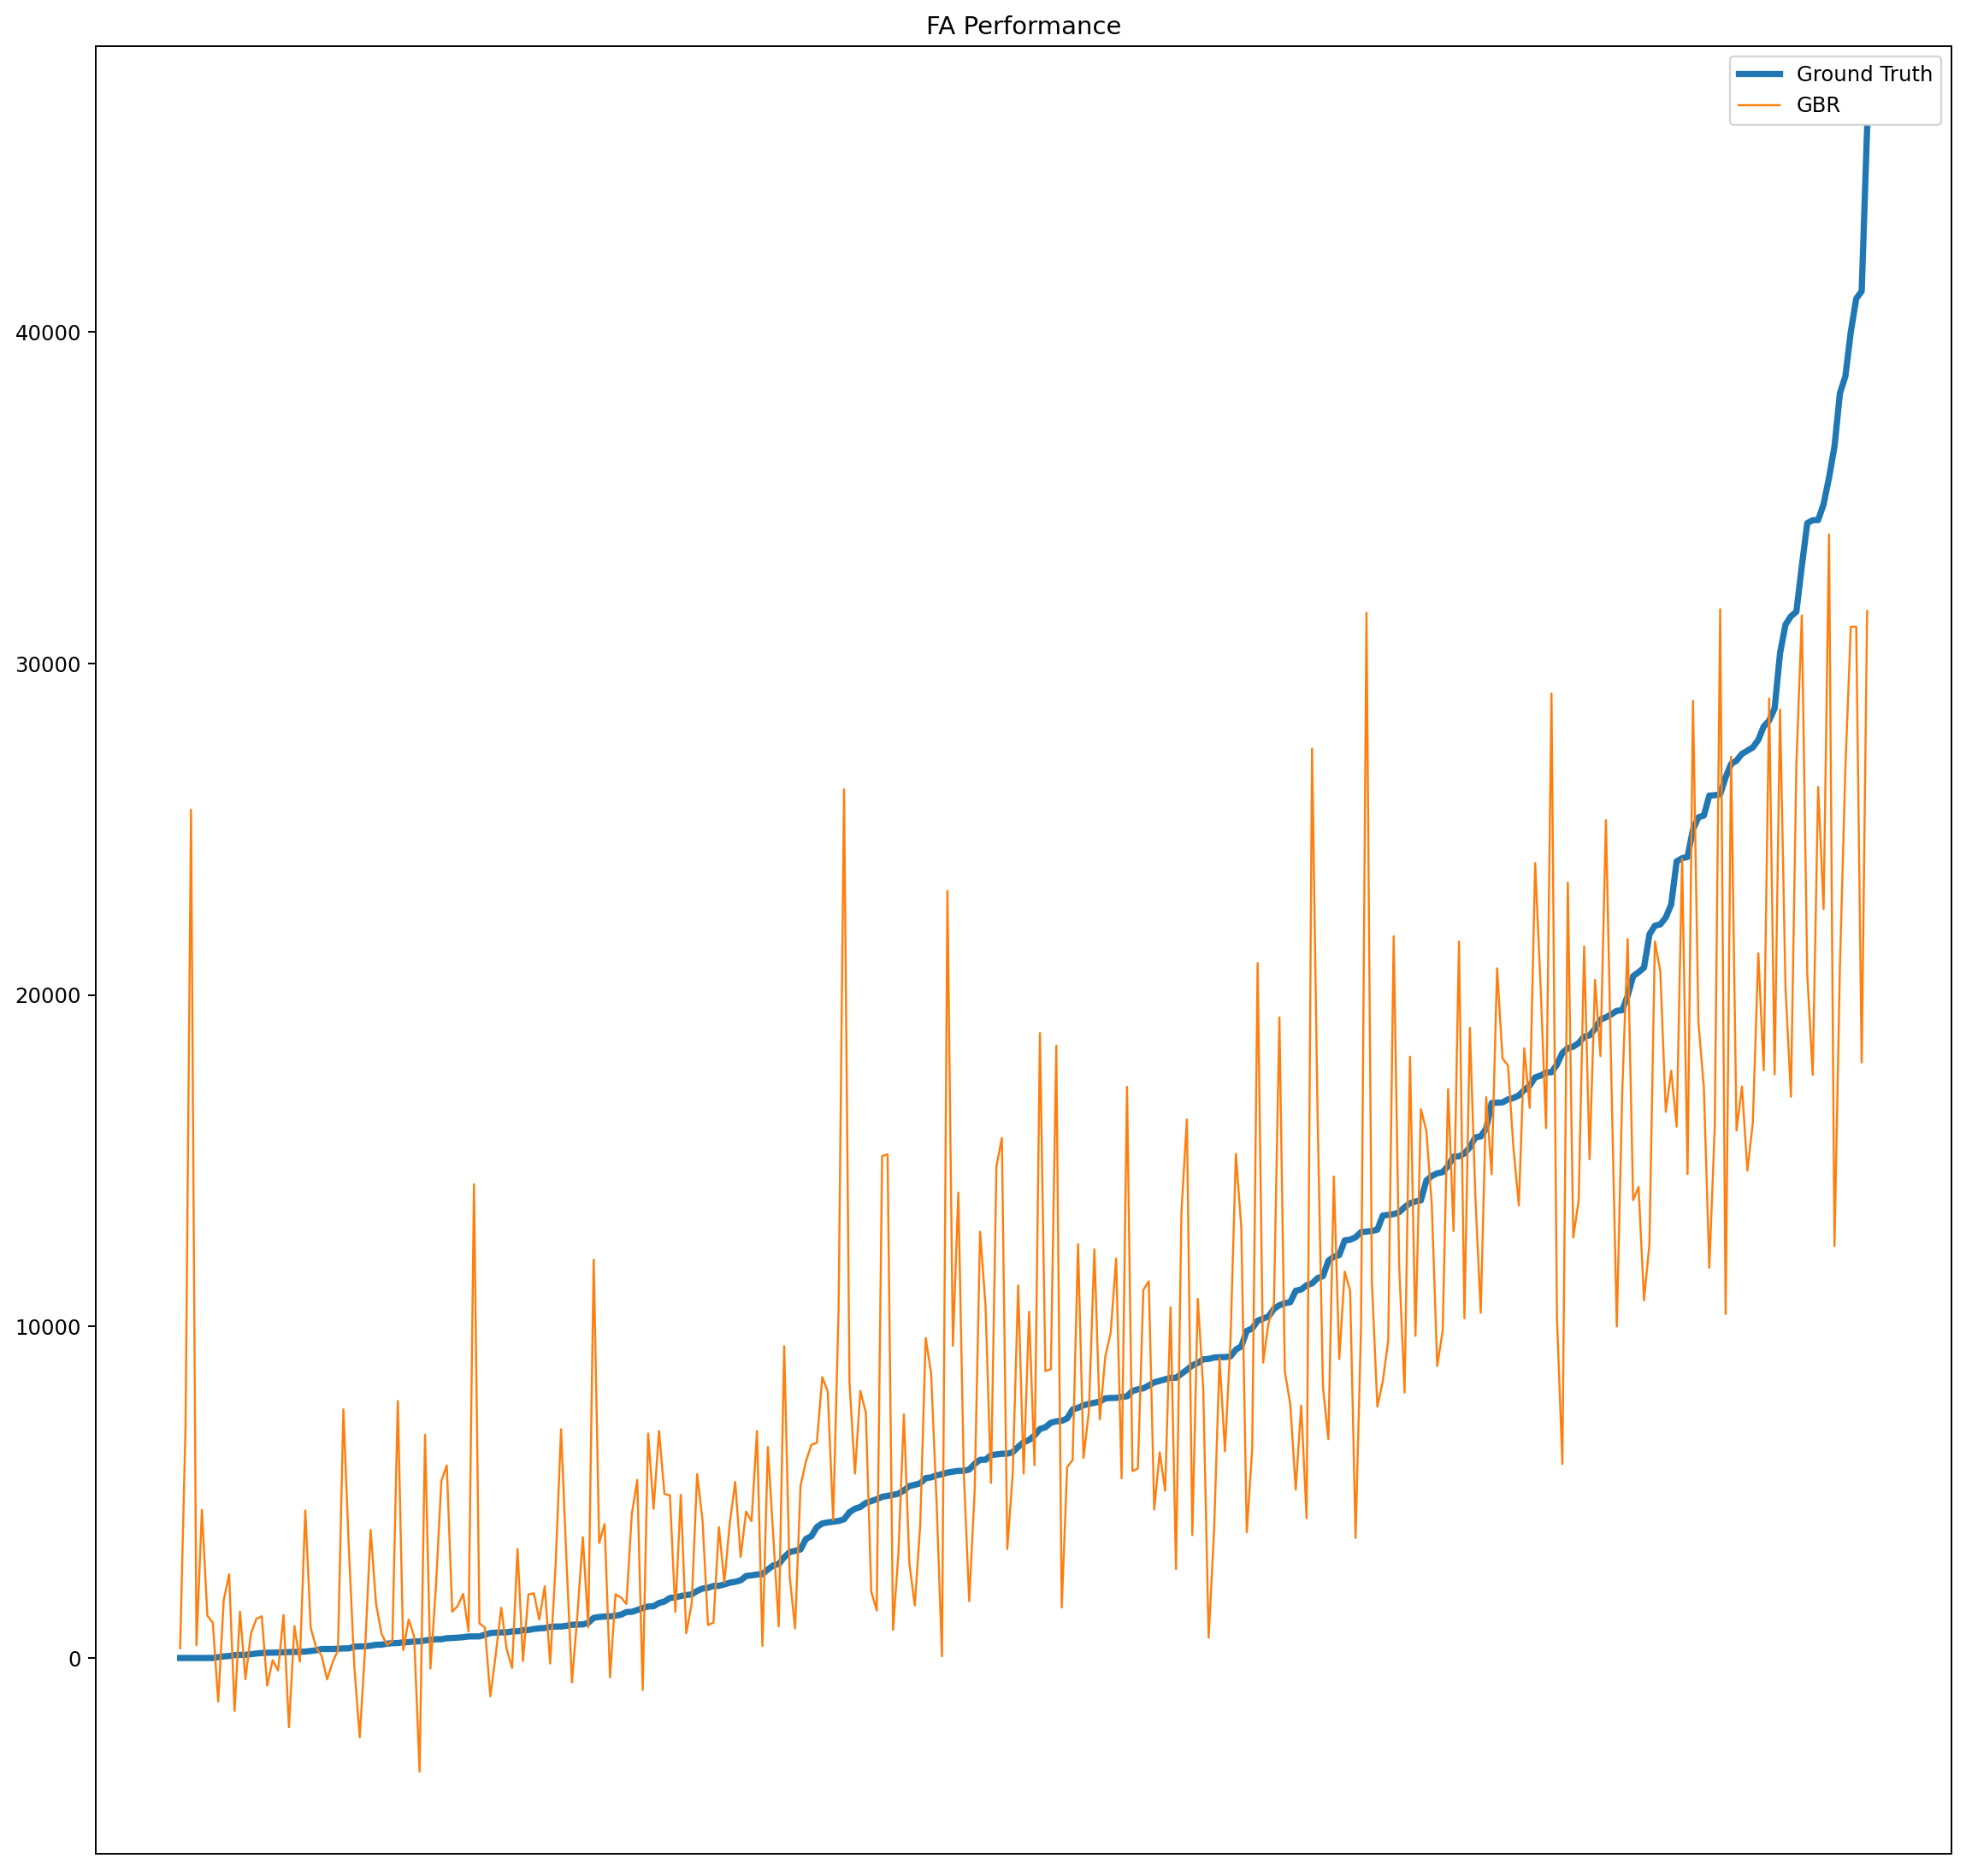

In [229]:
plt.figure(facecolor=(1,1,1), figsize=(16, 16), dpi=175)
plt.title('FA Performance')
plt.plot(y_preds['Not_Vaccinated_Count'], label = 'Ground Truth', linewidth = 3)

#plt.plot(X_test_df.index, y_hat_dtr, label = 'DTR', linewidth = 1)
#plt.plot(X_test.index, y_hat_lin_reg, label = 'Lin Reg', linewidth = 1)
#plt.plot(X_test.index, y_hat_lasso, label = 'Lasso', linewidth = 1)
#plt.plot(X_test.index, y_hat_ridge, label = 'Ridge', linewidth = 1)  
#plt.plot(X_test.index, y_hat_enr, label = 'ENR', linewidth = 1)
#plt.plot(X_test.index, y_hat_knr, label = 'KNR', linewidth = 1)
#plt.plot(X_test_df.index, y_hat_rfr, label = 'RFR', linewidth = 1)
plt.plot(y_preds['y_hat_gbr'], label = 'GBR', linewidth = 1)

plt.gca().axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

In [230]:
y_preds_z = y_test_z_df
y_preds_z['Not_Vaccinated_Count'] = standard_scaler_y.inverse_transform(y_test_z_df.values)
y_preds_z.head()

,Not_Vaccinated_Count
91906,2331.544627
90804,19940.077858
93669,210.898905
92411,15453.525052
95621,21785.982162


In [231]:
#y_preds['y_hat_gbr'] = y_hat_gbr
y_preds_z['y_hat_gbr_z'] = y_hat_gbr_z
y_preds_z.head()

,Not_Vaccinated_Count,y_hat_gbr_z
91906,2331.544627,402.981125
90804,19940.077858,20156.008372
93669,210.898905,24.330440
92411,15453.525052,18121.687673
95621,21785.982162,18391.357404


In [232]:
y_preds_z.sort_values(by= ['Not_Vaccinated_Count'], inplace=True)

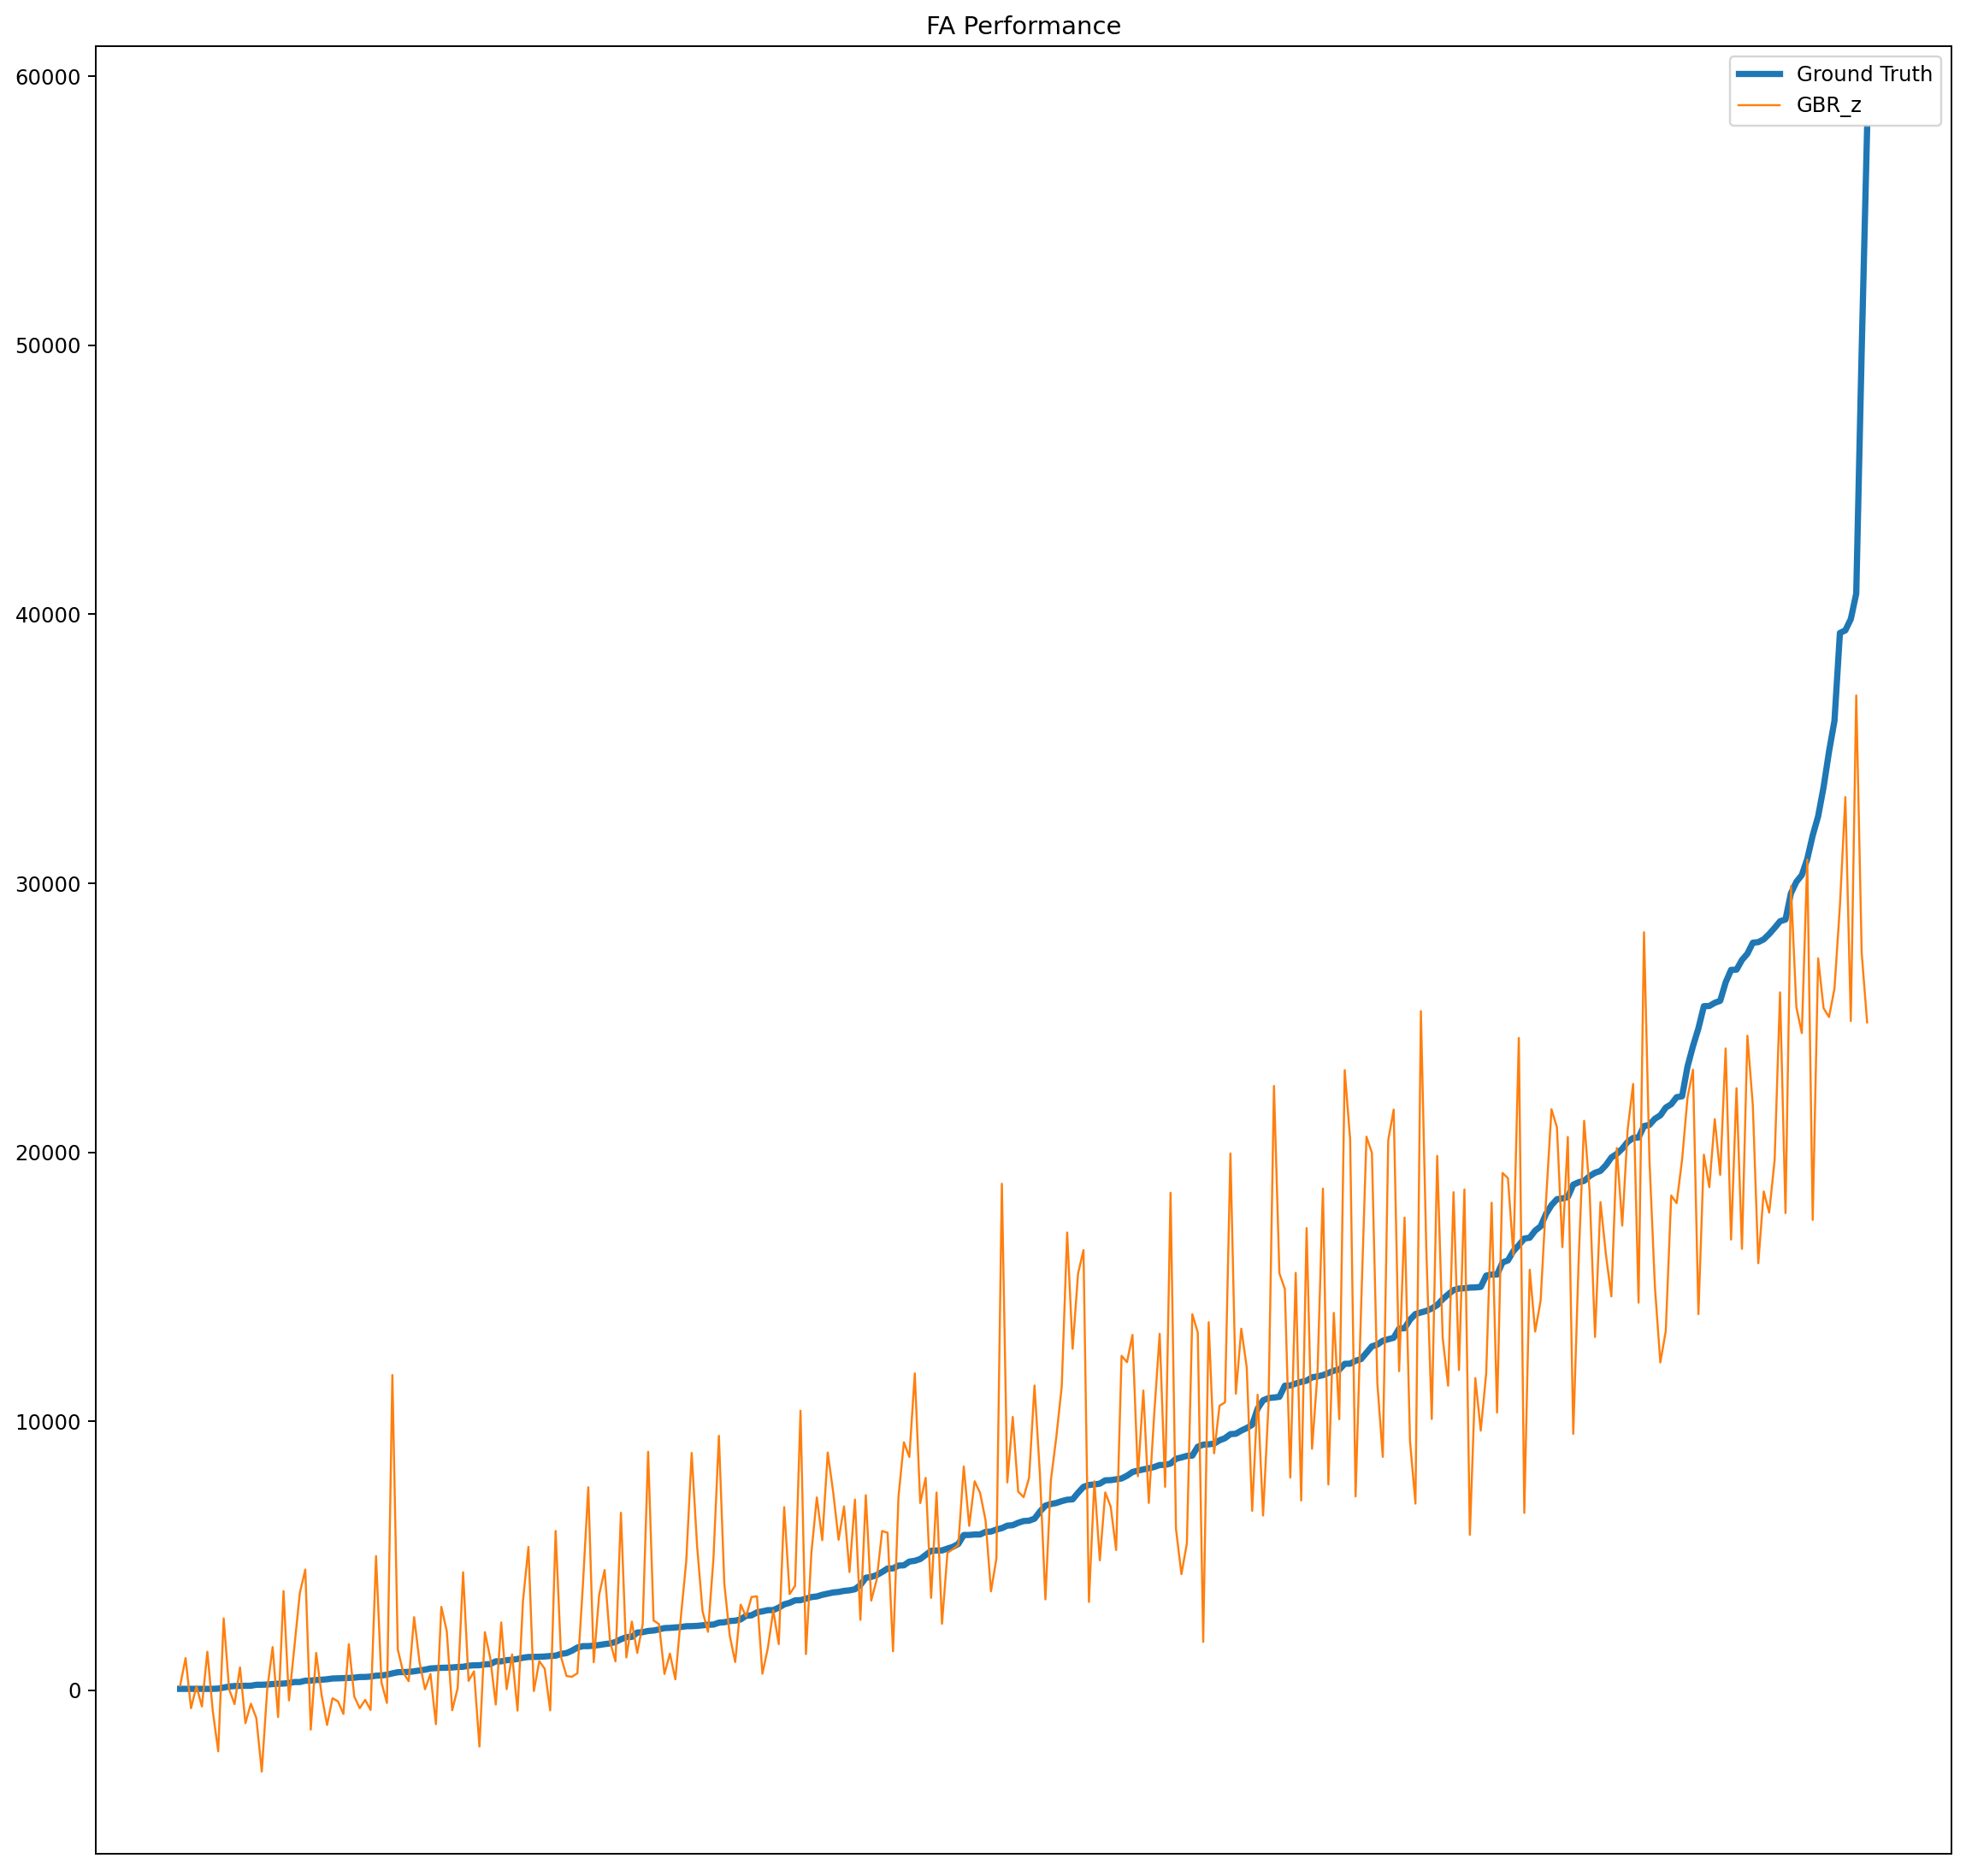

In [233]:
plt.figure(facecolor=(1,1,1), figsize=(16, 16), dpi=175)
plt.title('FA Performance')
plt.plot(y_preds_z['Not_Vaccinated_Count'], label = 'Ground Truth', linewidth = 3)

#plt.plot(X_test_df.index, y_hat_dtr_z, label = 'DTR_z', linewidth = 2)
#plt.plot(X_test.index, y_hat_lin_reg_z, label = 'Lin Reg_z', linewidth = 1)
#plt.plot(X_test.index, y_hat_lasso_z, label = 'Lasso_z', linewidth = 1)
#plt.plot(X_test.index, y_hat_ridge_z, label = 'Ridge_z', linewidth = 1)  
#plt.plot(X_test.index, y_hat_enr_z, label = 'ENR_z', linewidth = 1)
#plt.plot(X_test.index, y_hat_knr_z, label = 'KNR_z', linewidth = 1)
#plt.plot(X_test_df.index, y_hat_rfr_z, label = 'RFR_z', linewidth = 2)
plt.plot(y_preds_z['y_hat_gbr_z'], label = 'GBR_z', linewidth = 1)



plt.gca().axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

In [234]:
#THIS METRIC DOES NOT WORK
from sklearn.metrics import explained_variance_score
print('DTR:', explained_variance_score(y_test, y_hat_dtr), 'RFR:', explained_variance_score(y_test, y_hat_rfr),'GBR:',explained_variance_score(y_test, y_hat_gbr))

DTR: 0.2231944236185457 RFR: 0.6081980969011721 GBR: 0.6322811441918774


In [239]:
from sklearn.metrics import explained_variance_score
print('DTR_z:', explained_variance_score(y_test_z , y_hat_dtr_z), 'RFR_z:', explained_variance_score(y_test_z , y_hat_rfr_z),'GBR_z:',explained_variance_score(y_test_z, y_hat_gbr_z))

DTR_z: 0.348672492409158 RFR_z: 0.6918864444439983 GBR_z: 0.7533686455449762


In [238]:
y_test_z_df.values

array([[ 4.96818343e+01,  1.69395535e+02],
       [ 4.96818343e+01,  1.19394946e+03],
       [ 4.96818343e+01, -6.71081676e+02],
       [ 4.96818343e+01,  1.46970287e+02],
       [ 4.96818343e+01, -6.06405042e+02],
       [ 4.96818343e+01,  1.42960071e+03],
       [ 4.96818343e+01, -7.80728046e+02],
       [ 5.99366410e+01, -2.27208818e+03],
       [ 9.69011444e+01,  2.66935682e+03],
       [ 1.36210735e+02,  3.46840804e+01],
       [ 1.54561811e+02, -5.16235081e+02],
       [ 1.59623385e+02,  8.47678590e+02],
       [ 1.63461752e+02, -1.22480846e+03],
       [ 1.64975129e+02, -5.04347319e+02],
       [ 2.01530845e+02, -1.03606190e+03],
       [ 2.02670571e+02, -3.02667026e+03],
       [ 2.10898905e+02,  2.43304402e+01],
       [ 2.28270528e+02,  1.60344059e+03],
       [ 2.40951194e+02, -9.98070835e+02],
       [ 2.46432853e+02,  3.68671412e+03],
       [ 2.69677937e+02, -3.77622482e+02],
       [ 3.03149345e+02,  1.62772847e+03],
       [ 3.04126660e+02,  3.61880535e+03],
       [ 3.